In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def addPadding(img: np.array, padding: int) -> np.array:
    """
        Applies padding to the image
    """
    npImg = np.asarray(img)
    npPadImg = np.pad(npImg, ((padding, padding),(padding, padding)))

    return npPadImg

In [4]:
def applyLowPass(img: np.array, maskSize: int) -> np.array:
    """
        img: Image to apply the mask
        maskSize: size of mask to apply

    """
    mask = np.ones([maskSize, maskSize], dtype = int)
    mask = mask/(maskSize*maskSize)
    m, n = img.shape
    img = addPadding(img, maskSize-2)
    img_new = np.zeros([m, n])
    
    for i in range(m):
        for j in range(n):
            temp = 0
            for k1 in range(maskSize):
                for k2 in range(maskSize):
                    temp += mask[k1, k2]*img[i-maskSize//2+k1, j-maskSize//2+k2]
                    # temp += img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
         
            img_new[i, j]= temp
    return img_new
    

## Original Image-1

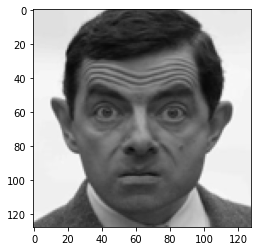

In [5]:

img = Image.open("align-bean1.jpg").convert('L')
img = img.resize((128,128))
img = np.array(img)

plt.imshow(img, cmap ='gray', vmin=0, vmax=255)

## Low Pass Image

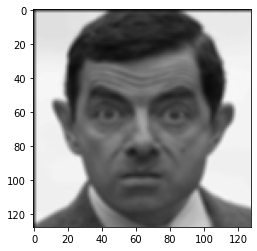

In [6]:
img = Image.open("align-bean1.jpg").convert('L')
img = img.resize((128,128))
img = np.array(img)
imgLowPass = applyLowPass(img, 3)
plt.imshow(imgLowPass, cmap ='gray', vmin=0, vmax=255)

## Original Image-2

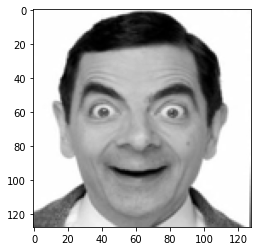

In [7]:
# Read the image
img = Image.open("align-bean2.jpg").convert('L')
img = img.resize((128,128))
img = np.array(img)

plt.imshow(img, cmap ='gray', vmin=0, vmax=255)


In [8]:
def applyHighFilter(img: np.array, filterSize: int)-> np.array:
    """
        img: Image to apply the mask
        maskSize: size of mask to apply

    """
    mask = np.ones([filterSize, filterSize], dtype = int)
    totSize = filterSize*filterSize
    mask = mask/totSize
    mask = -1*(mask)
    mask[filterSize//2][filterSize//2] = (8)/(totSize)
    m, n = img.shape
    img = addPadding(img, filterSize-2)
    img_new = np.zeros([m, n])
    # print(mask)
    for i in range(m):
        for j in range(n):
            temp = 0
            for k1 in range(filterSize):
                for k2 in range(filterSize):
                    temp += mask[k1, k2]*img[i-filterSize//2+k1, j-filterSize//2+k2]
            
            img_new[i, j]= temp
    return img_new

# High Pass filter Image

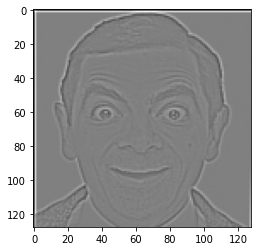

In [9]:
img = Image.open("align-bean2.jpg").convert('L')
img = img.resize((128,128))
img = np.array(img)
imgHighPass = applyHighFilter(img, 3)
plt.imshow(imgHighPass + 0.5*255, cmap ='gray', vmin=0, vmax=255)

# Combined Images for Different Mask Sizes
MASK Size-3

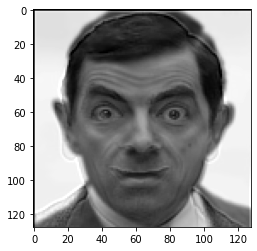

In [10]:

imgCombined = np.add(imgHighPass,imgLowPass)

plt.imshow(imgCombined, cmap ='gray', vmin=0, vmax=255)

In [12]:
def getNormDist(x, mean, standDev):
    return 1 / (np.sqrt(2 * np.pi) * standDev) * np.e ** (-np.power((x -mean) / standDev, 2) / 2)
 
 
def gaussianKernel(size, sigma=1):
    kernel1 = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel1[i] = getNormDist(kernel1[i], 0, sigma)
    kernel2 = np.outer(kernel1.T, kernel1.T)
 
    
 
    return kernel2

[[0.05854983 0.09653235 0.05854983]
 [0.09653235 0.15915494 0.09653235]
 [0.05854983 0.09653235 0.05854983]]


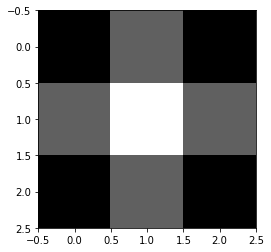

In [13]:
gKernel = gaussianKernel(3)
print(gKernel)
plt.imshow(gKernel, cmap ='gray')

In [14]:
def applyGaussianBlur(img: np.array, filterSize: int = 3 ,sigma: int = 1, mask = []) -> np.array:
    """
        `Image`: input Image 
        `filterSize`: size of filter to apply
        `ret`: smoothened Image
    """
    
    mask = gaussianKernel(filterSize, sigma = sigma)
    # print(mask)
    m, n = img.shape
    img = addPadding(img, filterSize-2)
    img_new = np.zeros([m, n])
    
    for i in range(m):
        for j in range(n):
            temp = 0
            for k1 in range(filterSize):
                for k2 in range(filterSize):
                    temp += mask[k1, k2]*img[i-filterSize//2+k1, j-filterSize//2+k2]
                    
            img_new[i, j]= temp
    return img_new

## Appllying Gaussian Blur with different Params
1. sigma = 1, filterSize = 5

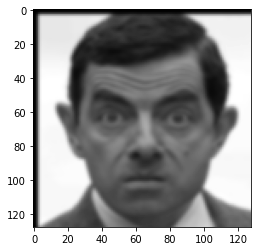

In [54]:
img = Image.open("align-bean1.jpg").convert('L')
img = img.resize((128,128))
img = np.array(img)
imgGaussian = applyGaussianBlur(img, filterSize =5,sigma = 1)
plt.imshow(imgGaussian, cmap ='gray')

Sigma= 10, filter=3

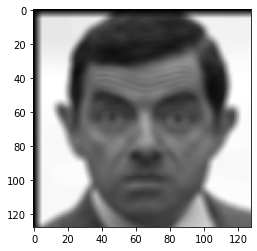

In [55]:
img = Image.open("align-bean1.jpg").convert('L')
img = img.resize((128,128))
img = np.array(img)
imgGaussian = applyGaussianBlur(img, filterSize =5,sigma = 10)
plt.imshow(imgGaussian, cmap ='gray')

Sigma =1, filterSize = 3

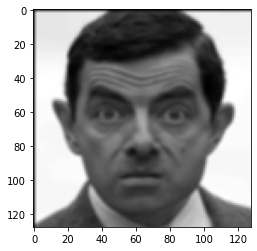

In [56]:
img = Image.open("align-bean1.jpg").convert('L')
img = img.resize((128,128))
img = np.array(img)

imgGaussian = applyGaussianBlur(img, filterSize=3, sigma= 1)
plt.imshow(imgGaussian, cmap ='gray')

sigma = 5, filterSize = 7

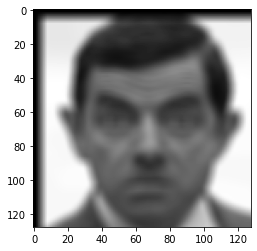

In [58]:
img = Image.open("align-bean1.jpg").convert('L')
img = img.resize((128,128))
img = np.array(img)

imgGaussian = applyGaussianBlur(img, filterSize = 7,sigma=5)
plt.imshow(imgGaussian, cmap ='gray')

In [21]:
def downSample(img: np.array)-> np.array:
    img = applyGaussianBlur(img, 5)
    n,m = img.shape
    imgDownSample = np.zeros((n//2, m//2))
    for i in range(n//2):
        for j in range(m//2):
            imgDownSample[i][j] = img[2*i][2*j]

    return imgDownSample

In [22]:
def makeGaussianPyramid(img : np.array, levels: int=3, verbose: bool = False):
    gaussianPyramid = [img]
    for _ in range(levels):
        imgDownscaled = downSample(img)
        img = imgDownscaled
        gaussianPyramid.append(img)

    if(verbose):
        plt.autoscale(False)
        for img in gaussianPyramid: 
            plt.figimage(img, cmap='gray')

    return gaussianPyramid

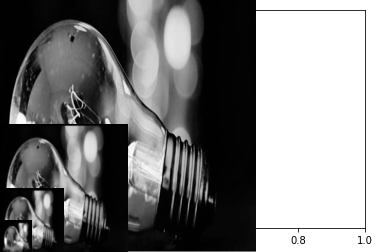

In [23]:
img = Image.open("lightBulb.jpeg").convert('L')
img = img.resize((256,256))
img = np.array(img)

gPyramid = makeGaussianPyramid(img, levels = 3, verbose = True)

In [24]:
def upSample(img: np.array) -> np.array:
    """
        Adds zeros in alternating rows and columns and apply gaussain blurr
        `img`: Image to be upsampled
        `ret`: the upsampled image

    """
    n,m = img.shape
    imgNew = np.zeros((2*n,2*m))

    for i in range(n):
        for j in range(m):
            imgNew[2*i,2*j] = img[i,j]
    
    imgNew = applyGaussianBlur(imgNew, filterSize = 5)
    return 4*imgNew

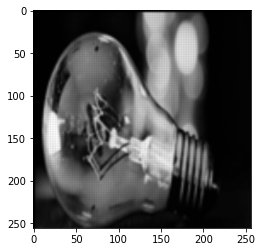

In [25]:
img = Image.open("lightBulb.jpeg").convert('L')
img = img.resize((128,128))
img = np.array(img)

imgUpsampled = upSample(img)
plt.imshow(imgUpsampled, cmap ='gray')

In [26]:
def makeLaplacianPyramid(img: np.array, levels: int =3, verbose: bool = False):
    gaussianPyramid = makeGaussianPyramid(img, levels=levels)
    laplacianPyramid = [gaussianPyramid[-1]]
    for idx in range(levels-1,-1,-1):
        lapSub = np.array(upSample(laplacianPyramid[-1]))
        lapImg = np.subtract(gaussianPyramid[idx],lapSub)
        laplacianPyramid.append(lapImg)

    
    laplacianPyramid.reverse()

    if(verbose):
        plt.autoscale(False)
        for img in laplacianPyramid: 
            plt.figimage(img, cmap='gray')
    
    return laplacianPyramid

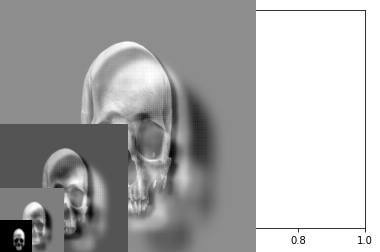

In [27]:
img = Image.open("skull.jpeg").convert('L')
img = img.resize((256,256))
img = np.array(img)

lPyramid  = makeLaplacianPyramid(img, 3, verbose = True)

In [28]:
import cv2

def cv2GaussianPyramid(img: np.array, levels: int = 3, verbose: bool = False):
    gaussianPyramid = [img]
    for _ in range(levels):
        img = cv2.pyrDown(img)
        gaussianPyramid.append(img)

    if(verbose):
        plt.autoscale(False)
        for img in gaussianPyramid: 
            plt.figimage(img, cmap='gray')

    return gaussianPyramid


def cv2LaplacianPyramid(gp: np.array,levels: int = 3):
    laplacianPyramid = [gp[5]]
    for i in range(levels,0,-1):
        GE = cv2.pyrUp(gp[i])
        L = cv2.subtract(gp[i-1],GE)
        laplacianPyramid.append(L)   

    return laplacianPyramid

def blendImgs(A: np.array, B: np.array) -> np.array:
    """
        `img1`: Image to be blended
        `img2`: Image to be blended with
        `ret`: blended image
    """
    G = A.copy()
    gpA = cv2GaussianPyramid(G, levels = 6)

    G = B.copy()
    gpB = cv2GaussianPyramid(G, levels = 6)

    lpA = cv2LaplacianPyramid(gpA, levels = 5)
    lpB = cv2LaplacianPyramid(gpB, levels = 5)

    LS = []
    for la,lb in zip(lpA,lpB):
        cols = la.shape[1]
        ls = np.hstack((la[:,0:int(cols/2)], lb[:,int(cols/2):]))
        LS.append(ls)

    imageBlended = LS[0]
    for i in range(1,6):
        imageBlended = cv2.pyrUp(imageBlended)
        imageBlended = cv2.add(imageBlended, LS[i])
        
    plt.figure(); plt.imshow(np.hstack((A[:,:128],B[:,128:])), cmap='gray')
    plt.figure(); plt.imshow(imageBlended, cmap='gray')
    


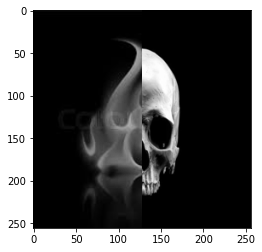

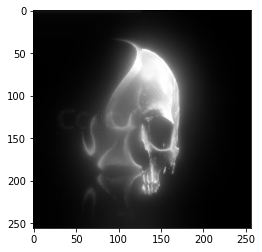

In [29]:
img1 = Image.open("fire.jpeg").convert("L")
img1 = img1.resize((256,256))
img1 = np.array(img1)


img2 = Image.open("skull.jpeg").convert("L")
img2 = img2.resize((256,256))
img2 = np.array(img2)

blendedImg = blendImgs(img1, img2)

# Qn-5 Frequency domain mixing

In [30]:
import numpy as np

def createLPFilter(n: int,m: int, radius) -> np.array:
    """
        Creates a Gaussian low-pass filter
            B[r,c] = e^-(Dr,c)/ 4*radius^2
        
        `n,m` : shape of image
        `center`: coordinate of center of image
        `radius`: given radius of image

        `ret`: lowPass Gaussian filter
    """

    rows, cols = n,m
    r, c = np.mgrid[0:rows:1, 0:cols:1]
    center = (n//2, m//2)
    c -= center[0]
    r -= center[1]
    d = np.power(c, 2.0) + np.power(r, 2.0)
    
    lpFilter = np.exp(-d/(2*pow(radius, 2.0)))
    
    
    return lpFilter

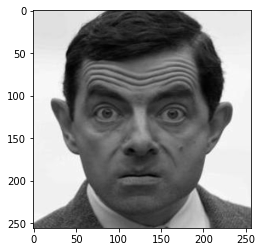

In [31]:
# Original Image
img = Image.open("align-bean1.jpg").convert('L')
img = img.resize((256,256))
plt.imshow(img, cmap='gray')

In [32]:
def doFFT(img: np.array) -> np.array:
    """
        Caculates discrete fourier transform of image array
    """
    dft = np.fft.fft2(img, axes=(0,1))
    dftShift = np.fft.fftshift(dft)
    return dftShift


def doIFT(img: np.array) -> np.array:
    """
        Calculates inverse fourier transform of array
    """
    backIshift = np.fft.ifftshift(img)
    imgFiltered = np.fft.ifft2(backIshift, axes=(0,1))
    return imgFiltered


def applyMask(img: np.array, mask: np.array) -> np.array:
    """
        Applies mask in frequency domain
    """
    return  np.multiply(img,mask)


def convertComplexToImg(arr: np.array) -> np.array:
    """
        Converts complex type array to visual array
    """
    img = np.abs(arr).clip(0,255)
    return img


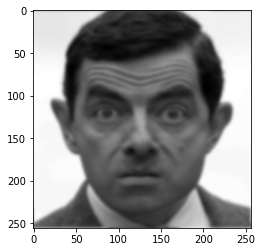

In [33]:
img = Image.open("align-bean1.jpg").convert('L')
img = img.resize((256,256))
img = np.array(img)
# Forward
dftImg = doFFT(img)
mask = createLPFilter(256, 256, 25)

# Masking
dftMasked = applyMask(dftImg, mask)

#Backward
complexImg = doIFT(dftMasked)
imgLowPass = convertComplexToImg(complexImg)

plt.imshow(imgLowPass, cmap='gray')

In [34]:
def createHPFilter(n: int,m: int, radius, n1: int=2) -> np.array:
    """
        Creates a Gaussian filter
        `n,m` : shape of image
        `center`: coordinate of center of image
        `radius`: given radius of image
        `n1`: parameter in filter

        `ret`: HighPass Gaussian filter
    """

    rows, cols = n,m
    r, c = np.mgrid[0:rows:1, 0:cols:1]
    center = (n//2, m//2)
    c -= center[0]
    r -= center[1]
    d = np.power(c, 2.0) + np.power(r, 2.0)
    
    hpFilter = 1.0 - np.exp(-d/(2*pow(radius, 2.0)))
    
    
    return hpFilter

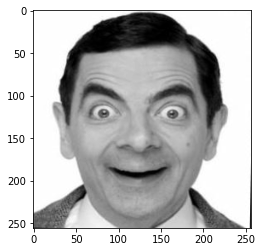

In [35]:
# Orignal Image
img = Image.open("align-bean2.jpg").convert('L')
img = img.resize((256,256))

plt.imshow(img, cmap='gray')

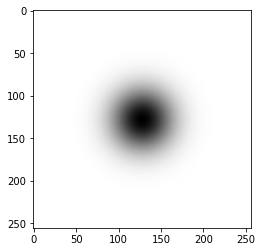

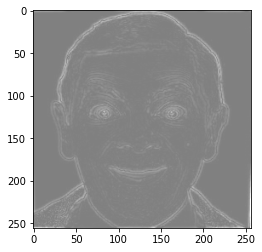

In [36]:
img = Image.open("align-bean2.jpg").convert('L')
img = img.resize((256,256))
img = np.array(img)
# Forward
dftImg = doFFT(img)
mask = createHPFilter(256, 256, 25)
plt.figure(); plt.imshow(mask, cmap='gray');
# Masking
dftMasked = applyMask(dftImg, mask)

#Backward
complexImg = doIFT(dftMasked)
imgHighPass = convertComplexToImg(complexImg)

plt.figure(); plt.imshow(imgHighPass+0.5*255,cmap='gray', vmin=0, vmax=255)

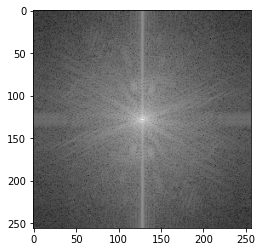

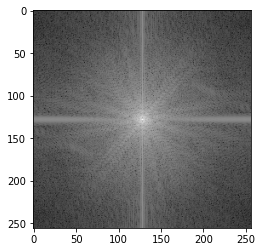

In [37]:
img1 = Image.open("align-bean1.jpg").convert("L")
img1 = img1.resize((256,256))
dftImg1 = doFFT(np.array(img1))
plt.figure(); plt.imshow(np.log(np.abs(dftImg1)), cmap='gray');


img2 = Image.open("align-bean2.jpg").convert("L")
img2 = img2.resize((256,256))
dftImg2 = doFFT(np.array(img2))
plt.figure(); plt.imshow(np.log(np.abs(dftImg2)), cmap='gray');

In [38]:
def blendInFreqDomain(dftImg1: np.array, dftImg2: np.array, radius: float) -> np.array:
    """
        Blends two images in frequency domain
    """
    dftImgBlended  = dftImg1.copy()
    n,m = dftImg1.shape
    center = n//2, m//2
    for i in range(n):
        for j in range(m):
            d = pow(pow(i-center[0],2) + pow(j-center[1],2), 0.5)
            frac = np.exp(-d/(2*pow(radius, 2.0)))
            dftImgBlended[i,j] = dftImg1[i,j]*frac + dftImg2[i,j]*(1-frac)
    return dftImgBlended

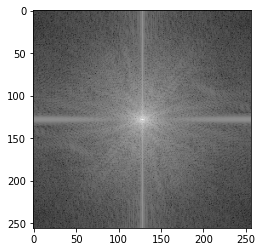

In [39]:
dftImgBlended = blendInFreqDomain(dftImg1, dftImg2, 5)
plt.imshow(np.log(np.abs(dftImgBlended)), cmap='gray')

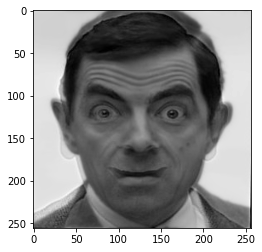

In [40]:
imgBlended = doIFT(dftImgBlended)
plt.imshow(np.abs(imgBlended), cmap='gray')

# Qn-6 
## Hybrid Mixing for color images

Using Laplacian Pyramids in spacial Domain

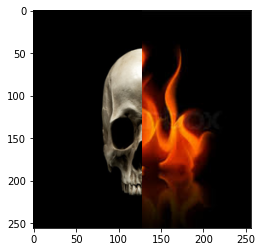

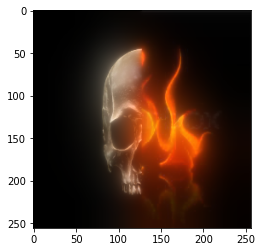

In [41]:
img1 = Image.open("skull.jpeg")
img1 = img1.resize((256,256))
img1 = np.array(img1)


img2= Image.open("fire.jpeg")
img2 = img2.resize((256,256))
img2 = np.array(img2)

blendImgs(img1, img2)